In [1]:
import pandas as pd
from DataProcessing import Data
from sklearn.neural_network import MLPRegressor


# 1. Get Data 

In [3]:
d = Data()
d.get_index_names()
chosen_index = 'AAPL'
d.preprocess(chosen_index)
df = d.get_data(chosen_index)
df= df.drop(['Date', 'Volume'],axis=1)
df.columns

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']
Processing AAPL.csv
Saved AAPL data at data/processed/AAPL.csv


Index(['High', 'Low', 'Close', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

## 2.1. Split data chronologically

In [4]:
INPUT_SHAPE=8
X = df[df.columns[0:INPUT_SHAPE]].values
Y = df[df.columns[INPUT_SHAPE]].values

In [5]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Scale data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.3. Scikit-learn Model

In [7]:
model = MLPRegressor(
    random_state=44,
    activation='relu',
    solver='adam', 
    max_iter=400,
    hidden_layer_sizes=(100, 100, 100),
    )

model.fit(X_train,Y_train)
model.score(X_test,Y_test)
Y_predict = model.predict(X_test)

# 3. Evaluate model

<Axes: >

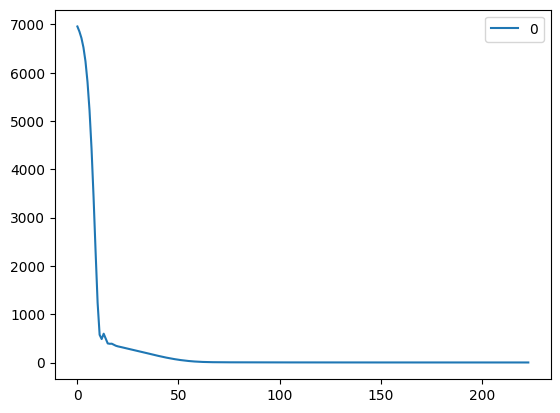

In [8]:
pd.DataFrame(model.loss_curve_).plot()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8.860285317798164
Mean Absolute Error: 2.3349301959590605
R-squared: 0.9770852400296927


## Plot Result

In [10]:
import matplotlib.pyplot as plt

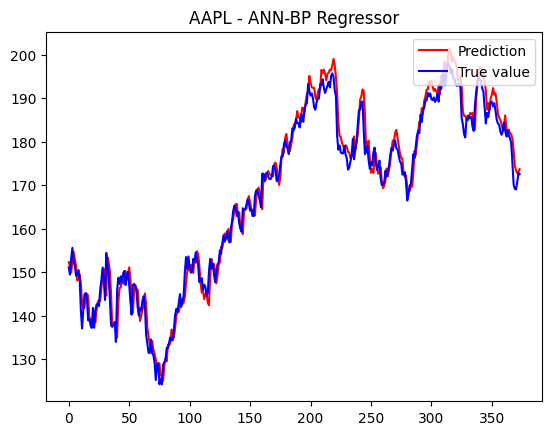

In [11]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor')
plt.show()